In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from keras.models import Sequential
from keras.layers import Dense


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras

In [2]:
current_dir = os.getcwd()
print(current_dir)
# print(os.path.join(current_dir,os.pardir))

# os.pardir represents the parent directory or the ".." notation.

# For example, if current_dir is "/home/user/projects" and os.pardir is "..", the os.path.join(current_dir, os.pardir) expression would return "/home/user/projects/..". This path points to the parent 
# directory of "/home/user/projects".

# As we know whenever we use 'cd ..' we get one directory back....and suppose we are at '/home/user' ...and we type cd projects directory will change to /home/user/projects...but if we type 'cd projects/..'
# the directory will remain same ...ie. '/home/user'......that's why whenever we see 'y/x..' it means parent directory ie. y here

# 'os.path.abspath()' ..it resolves the '..' symbol ...ie...if it is written 'y/x..' it will return y ...and suppose the directory is '/home/user/projects' but we have written './projects'..then it will return
# the whole path ie. '/home/user/projects'

# parent_dir = os.path.abspath(os.path.join(current_dir,'..'))
parent_dir = os.path.abspath(os.path.join(current_dir,os.pardir))
print(parent_dir)

grandparent_dir = os.path.abspath(os.path.join(parent_dir,os.pardir))
# print(os.path.join(parent_dir,os.pardir))
print(grandparent_dir)

csv_file_path = os.path.join(current_dir,'DataSets','crop_recommendation.csv')

c:\Users\91747\Crop-Prediction
c:\Users\91747
c:\Users


In [3]:
df = pd.read_csv(csv_file_path)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


## Seperate features and Labels

In [7]:
# x = df.drop('label',axis=1)
# y = df['label']


x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
x.head()


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [9]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

## Split the data into training and testing sets

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
x_train.shape,x_test.shape

((1760, 7), (440, 7))

In [12]:
y_train.shape,y_test.shape

((1760,), (440,))

## Different models we are going to use

In [13]:
# KNN
# Decision tree
# Naive bayes
# Random forest
# Gradient Boosting
# ANN

### 1. KNN

In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

score = knn.score(x_train,y_train)
score

0.9886363636363636

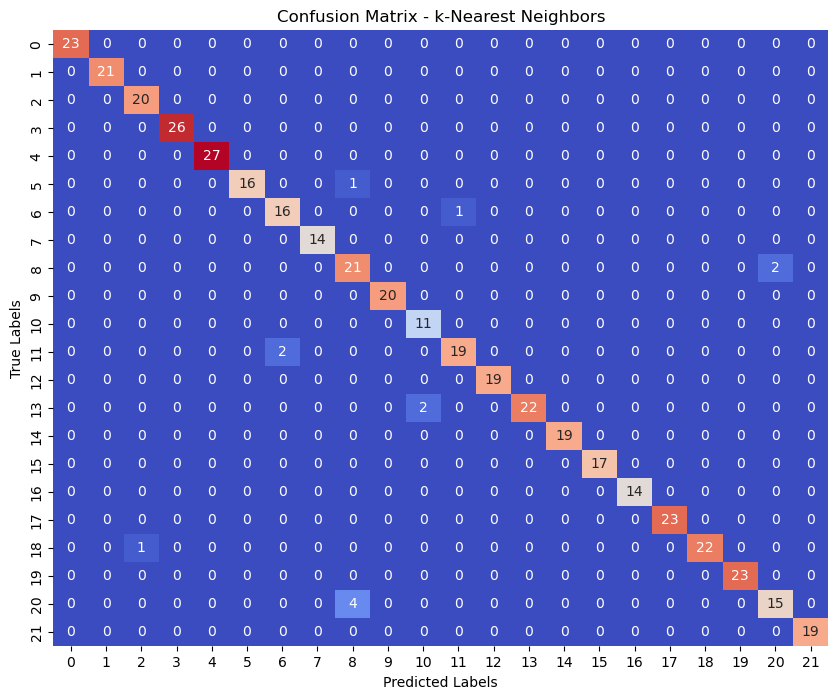

k-Nearest Neighbors Metrics:
Accuracy: 97.04545454545455
Precision: 0.9694304061951121
Recall: 0.9710372915548579
F1 Score: 0.969448367382909


In [15]:
ypred_knn = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test,ypred_knn)*100
precision_knn = precision_score(y_test,ypred_knn,average='macro')
recall_knn = recall_score(y_test,ypred_knn,average='macro')
f1_knn = f1_score(y_test,ypred_knn,average='macro')

cm_knn = confusion_matrix(y_test, ypred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - k-Nearest Neighbors')
plt.show()


print("k-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)


# Random Forest Classifier





# Grid Search

- Grid search is a technique used to find the best combination of hyperparameters for a machine learning model. Hyperparameters are settings that you choose before training the model, such as the learning rate or the number of hidden layers in a neural network. The idea behind grid search is to create a "grid" of possible values for these hyperparameters and try out all combinations to see which one performs the best.

- For example, let's say you have two hyperparameters: learning rate and number of trees. You can define a grid with different values for each hyperparameter, like [0.1, 0.01, 0.001] for the learning rate and [50, 100, 200] for the number of trees. Grid search will then train and evaluate the model for each combination of these values.

- Now, let's talk about cross-validation (CV). Cross-validation is a method to assess how well a model will perform on unseen data. It involves splitting your dataset into multiple subsets, called folds. One fold is kept aside as a validation set, and the remaining folds are used to train the model. This process is repeated several times, with each fold serving as the validation set once.

- In grid search, CV is used to evaluate the performance of each hyperparameter combination. For each combination, the dataset is divided into folds, and the model is trained and evaluated using each fold as the validation set. The performance metric, such as accuracy or mean squared error, is calculated for each iteration of cross-validation.

- If you mention that CV = 5, it typically means that the data will be divided into five folds or subsets. The model will then be trained and tested five times, with each fold serving as the validation set while the other four folds are used for training.

- During each iteration, a different fold acts as the validation set, and the remaining folds are combined to form the training set. This process allows for a more comprehensive evaluation of the model's performance by testing it on different subsets of the data.

- if CV = 5, it means that the cross-validation process will involve running five validation tests using different combinations of folds.

-  if cv = 3...it means it divides the whole training set into 3 differnet folds...and each time one fold acts as validation set and rest all folds(2) as training set...on which the model will be      
   trained internally... in this way each fold will get chance to become the validation set....after all the folds has become the validation set...then at last it takes the average of all the performace..and when 

- this step is done for all of the combination of param_grid...then it returns the parameters that yielded the maximum performance


In [16]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [17]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

In [18]:
# Perform GridSearch with Cross-Validation
grid_search = GridSearchCV(estimator=clf,param_grid=param_grid,cv=3)

# Now we fit our model with the best parameters returned by the above gridSearch
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [19]:
# best_params stores the combination of best parameters obtained during grid Search
best_params = grid_search.best_params_

# best_model stores the model that gave the highest performance(accuracy,precision,f1-score etc)...so best_model is the model trained with the best_params
best_model = grid_search.best_estimator_


In [20]:
print(best_params)
print(best_model)

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=15, min_samples_split=5)


In [21]:
score = best_model.score(x_train,y_train)
score

1.0

### Evaluating the Model

Best Hyper-parameters :  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test Accuracy : 98.4091
Precision : 0.9831
Recall: 0.9855
F1-Score: 0.9841


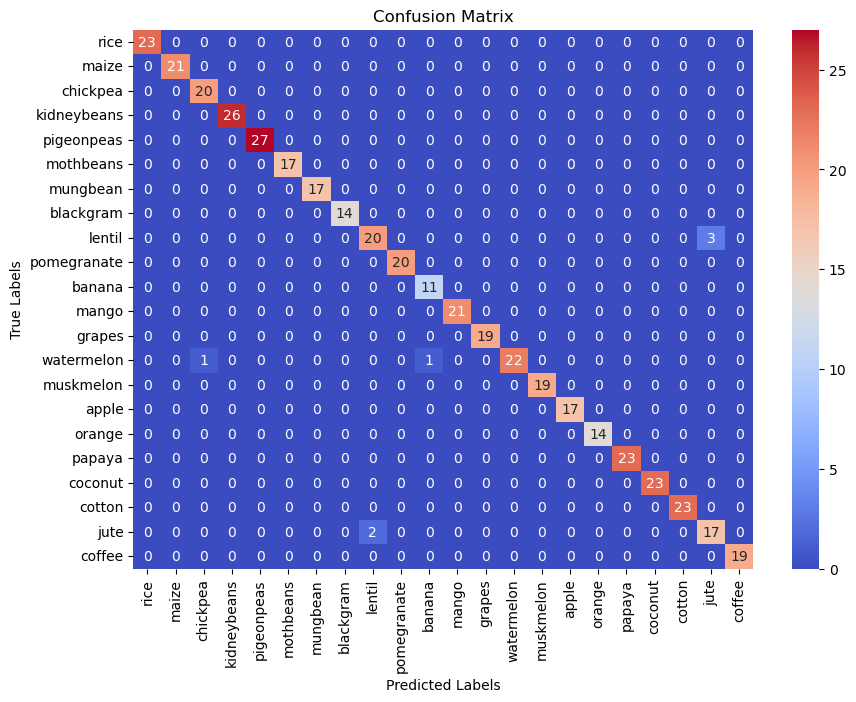

In [22]:
# Making predictions using our model on the test data 
y_pred = best_model.predict(x_test)


accuracy = accuracy_score(y_pred,y_test)*100
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')
cm = confusion_matrix(y_test,y_pred)
cm_df = pd.DataFrame(cm,index=df['label'].unique(),columns=df['label'].unique())
#print(cm_df)

print("Best Hyper-parameters : ",best_params)
print("Test Accuracy : {:.4f}".format(accuracy))
print("Precision : {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))

plt.figure(figsize=(10,7))
sns.heatmap(cm_df,annot=True,fmt='d',cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Decision Tree

In [23]:
dtree  = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train,y_train)


score = dtree.score(x_train,y_train)
score

1.0

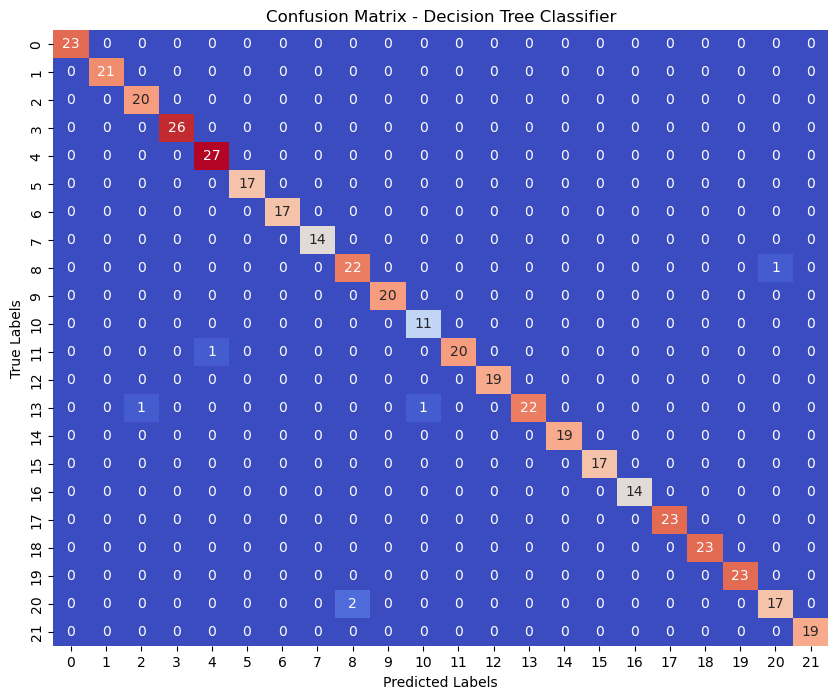

Decision tree classifier Metrics:
Accuracy: 98.63636363636363
Precision: 0.986111111111111
Recall: 0.9872866454674235
F1 Score: 0.9864168319981386


In [24]:
y_pred_dtree = dtree.predict(x_test)


accuracy_dtree = accuracy_score(y_test, y_pred_dtree)*100
precision_dtree = precision_score(y_test, y_pred_dtree, average='macro')
recall_dtree = recall_score(y_test, y_pred_dtree, average='macro')
f1_dtree = f1_score(y_test, y_pred_dtree, average='macro')


cm_dtree = confusion_matrix(y_test, y_pred_dtree)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


print("Decision tree classifier Metrics:")
print("Accuracy:", accuracy_dtree)
print("Precision:", precision_dtree)
print("Recall:", recall_dtree)
print("F1 Score:", f1_dtree)

Naive Bayes

In [25]:
nb = GaussianNB()
nb.fit(x_train,y_train)
score = nb.score(x_train,y_train)
score

0.9948863636363636

In [26]:
y_pred = nb.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)*100
print(f"Accuracy score using Naive Bayes Classifier is {accuracy}")

Accuracy score using Naive Bayes Classifier is 99.54545454545455


### Gradient Boosting

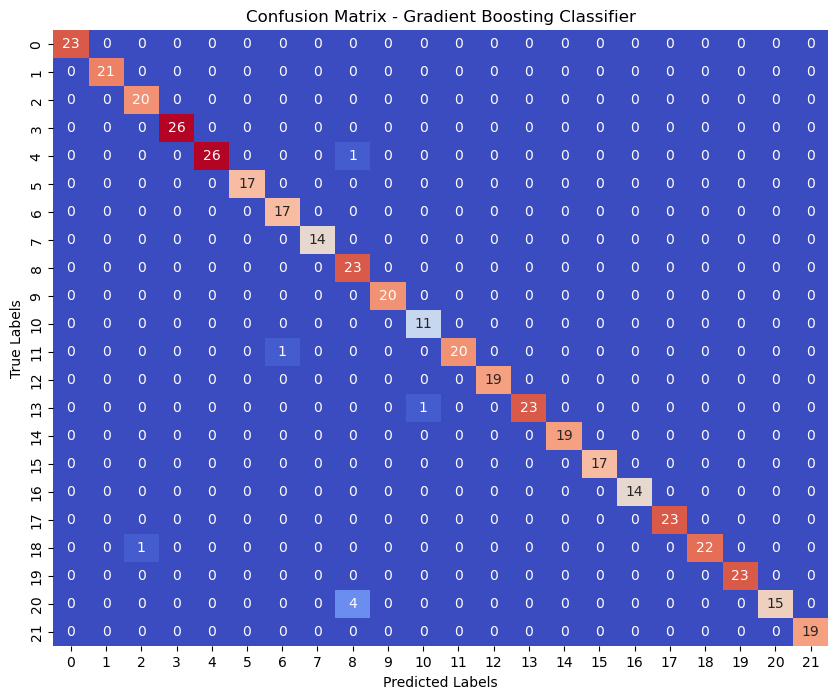

Gradient Boosting Classifier Metrics:
Accuracy: 98.18181818181819
Precision: 0.9834054834054833
Recall: 0.9827123941826458
F1 Score: 0.981868945715869


In [27]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)*100
precision_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')

cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()

print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)

### ANN

In [28]:
df = pd.read_csv('C:\\Users\\91747\\Crop-Prediction\\DataSets\\crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
x.shape,y.shape

((2200, 7), (2200,))

In [31]:
x.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
dtype: object

In [32]:
y.dtypes

dtype('O')

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)


In [34]:
#Using standard Scaler to bring all the values of x to a specific scale..
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [35]:
x_train.shape[1]

7

In [36]:
x_train.max(),x_train.min(),x_train.mean(),x_train.std()

(4.473664720657385, -3.842589433401015, -2.0935634178645809e-16, 1.0)

In [37]:
y_train.value_counts()

lentil         89
orange         86
grapes         86
muskmelon      83
cotton         83
coffee         83
mango          81
mungbean       81
watermelon     81
rice           81
kidneybeans    80
blackgram      80
banana         79
maize          79
pigeonpeas     77
papaya         77
jute           77
pomegranate    77
apple          77
mothbeans      76
chickpea       74
coconut        73
Name: label, dtype: int64

In [38]:
len(y_train.value_counts())

22

In [39]:
(x_train.shape[1],)

(7,)

In [40]:
y_test.head()

1451     muskmelon
1334    watermelon
1761        papaya
1735        papaya
1576         apple
Name: label, dtype: object

In [41]:
# Converting the categorical values of label column to numerical values...
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [42]:
num_classes = len(le.classes_)

# Convert labels to one-hot encoded vectors...this 
y_train = keras.utils.to_categorical(y_train_encoded, num_classes)
y_test = keras.utils.to_categorical(y_test_encoded, num_classes)

In [43]:
# Defining a instance for our model
model = Sequential()

# This is our input layer
model.add(Dense(128,activation='relu',input_shape=(x_train.shape[1],)))

# These two are our hidden layers
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

# This is our output layer...containing 22 neurons....here one thing to note...the output layer we use activation-function = 'softmax' and the number of neurons is 
# decided by the number of unique values in the label column...
model.add(Dense(22,activation='softmax'))



In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
55/55 [==============================] - 3s 7ms/step - loss: 2.7033 - accuracy: 0.3057
Epoch 2/100
55/55 [==============================] - 0s 6ms/step - loss: 1.4599 - accuracy: 0.6920
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 0.5414 - accuracy: 0.8665
Epoch 4/100
55/55 [==============================] - 0s 7ms/step - loss: 0.2891 - accuracy: 0.9278
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 0.2043 - accuracy: 0.9443
Epoch 6/100
55/55 [==============================] - 0s 6ms/step - loss: 0.1487 - accuracy: 0.9585
Epoch 7/100
55/55 [==============================] - 0s 6ms/step - loss: 0.1210 - accuracy: 0.9642
Epoch 8/100
55/55 [==============================] - 0s 6ms/step - loss: 0.1038 - accuracy: 0.9693
Epoch 9/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0901 - accuracy: 0.9761
Epoch 10/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0776 - accuracy: 0.9750
Epoch 11/

In [45]:
y_pred = model.predict(x_test)

14/14 [==============================] - 0s 3ms/step


In [46]:
len(np.unique(y_test))

2

In [47]:
len(np.unique(y_pred))

9312

In [48]:
y_test.shape,y_pred.shape

((440, 22), (440, 22))

Basic Method to calculate the accuracy ....Works for any model..


In [51]:
# y_pred = model.predict(x_test)

# y_pred_labels = np.argmax(y_pred,axis=1)

# y_pred_labels.shape
# num_correct_predictions = np.sum(y_pred_labels == y_test)

# total_data_points = len(y_test)
# accuracy = num_correct_predictions / total_data_points

# accuracy_percentage = accuracy*100

# print("Accuracy : " ,accuracy_percentage, "%")




# ## If after running this cell gives you the " operands could not be broadcast together with shapes (440,) (440,22) " error message then you need to match the shape 
# ## between "y_pred_labels" and "y_test" ....for this the correct code is given in next cell

In [58]:
# ypred = model.predict(x_test)

# y_test_labels = np.argmax(y_test,axis=1)
# y_pred_labels = np.argmax(y_pred,axis=1)


# num_correct_predictions = np.sum(y_pred_labels == y_test_labels)
# total_data_points = len(y_test)
# accuracy = num_correct_predictions / total_data_points

# accuracy_percentage = accuracy*100

# print("Accuracy :",accuracy_percentage,"%")



14/14 [==============================] - 0s 4ms/step
Accuracy : 97.04545454545455 %


In [59]:
loss,accuracy = model.evaluate(x_test,y_test)
print("Accuracy:",accuracy)

14/14 [==============================] - 0s 13ms/step - loss: 0.1173 - accuracy: 0.9705
Accuracy: 0.9704545736312866
